# REINFORCE

REINFORCE is a policy gradient Monte-Carlo approach. It is an on-policy method because otherwise the formula it is based upon wouldn't work.


$$
𝜃𝑡+1=𝜃𝑡+𝛼𝛾𝑡𝐺𝑡▿ln𝜋(𝐴𝑡|𝑆𝑡,𝜃)
$$


we have an ln because we had a formula of the form $\frac{\triangledown x}{x} = \triangledown \ln x$

# REINFORCE with Baseline

it converges much faster because we substract the state value to the MC gain, which tells us the action taken is better than what could be expected according to the actual estimation of the state value. 

We therefore also predict the state value with another set of parameters w.


$$
w_{t+1} = w_t + \alpha^w \gamma^t (G_t-V(S_t, w)) \triangledown_wv(S_t,w)
$$


$$
\theta_{t+1} = \theta_t + \alpha^{\theta} \gamma^t (G_t-V(S_t, w)) \triangledown \ln \pi(A_t|S_t, \theta)
$$
 

I know that you can put in common the parameters for the policy estimator and the state value approximator, But I have read somewhere that it is better not to do that.

# Models comparison

In [3]:
import  os
os.chdir(os.path.dirname("../"))
from utils import get_params
from Experiment import Experiment

In [5]:
exp_param = get_params('experiments/experiment_different_models_params')
exp_param = Experiment.load_exp_param(exp_param)
print(exp_param)

{'experiment_type': 'models comparison', 'num_sessions': 2, 'session_variants': {}, 'avg_results': True, 'session_params_names': ['reinforce_params', 'reinforce_with_baseline_params'], 'sessions_params': [{'session_info': {'session_type': 'REINFORCE', 'num_episodes': 1000, 'plot': False, 'show': False, 'show_every': 500, 'environment_name': 'CartPole-v0', 'return_results': True}, 'agent_info': {'discount_factor': 0.99, 'policy_estimator_info': {'layers_info': [{'type': 'linear', 'input_size': 4, 'output_size': 16, 'activation': 'relu'}, {'type': 'linear', 'input_size': 16, 'output_size': 2, 'activation': 'softmax'}], 'optimizer_info': {'type': 'adam', 'learning_rate': 0.001}}}}, {'session_info': {'session_type': 'REINFORCE with baseline', 'num_episodes': 1000, 'plot': False, 'show': False, 'show_every': 500, 'environment_name': 'CartPole-v0', 'return_results': True}, 'agent_info': {'discount_factor': 0.99, 'policy_estimator_info': {'layers_info': [{'type': 'linear', 'input_size': 4, 'o

/home/vaillus/projects/RL_toolkit/CustomNeuralNetwork.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layers[i](x))
/home/vaillus/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


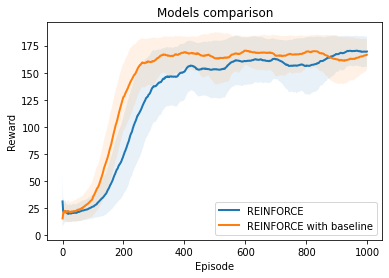

In [3]:
experiment = Experiment(exp_param)
experiment.run_meaningful_session()

We can see that REINFORCE converges faster with a baseline, and it gives better results overall. It also seams to be more stable.

In [6]:
from Session import Session
sess = Session(exp_param["sessions_params"][0])

In [7]:
sess.agent.policy_estimator.to("cuda")
#sess.agent.policy_estimator.device

/home/vaillus/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:104: UserWarning: 
GeForce RTX 3070 with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70 sm_75.
If you want to use the GeForce RTX 3070 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


CustomNeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=2, bias=True)
  )
)

In [7]:
import torch
torch.cuda.is_available()

/home/vaillus/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


False